# Forward-Adjacencies, Atlas



## Method

* Accumulate all source addresses and forward adjacencies collected by all traceroutes
* Ignore target addresses, only pay attention to liveness
* Currently this includes public & private measurements, which ought be re-worked if such a study were to be shared publicly


In [1]:
%load_ext google.cloud.bigquery

In [21]:
%%bigquery hourly_af_atlas_counts
SELECT ts, af, COUNT(*) as count
FROM `data-test-194508.sds_test.analysis_atlas_adj_addrs_count`
GROUP BY ts, af
ORDER BY ts

## Forward-adjacencies observed per-hour, per-address-family


(0, 665695.4)

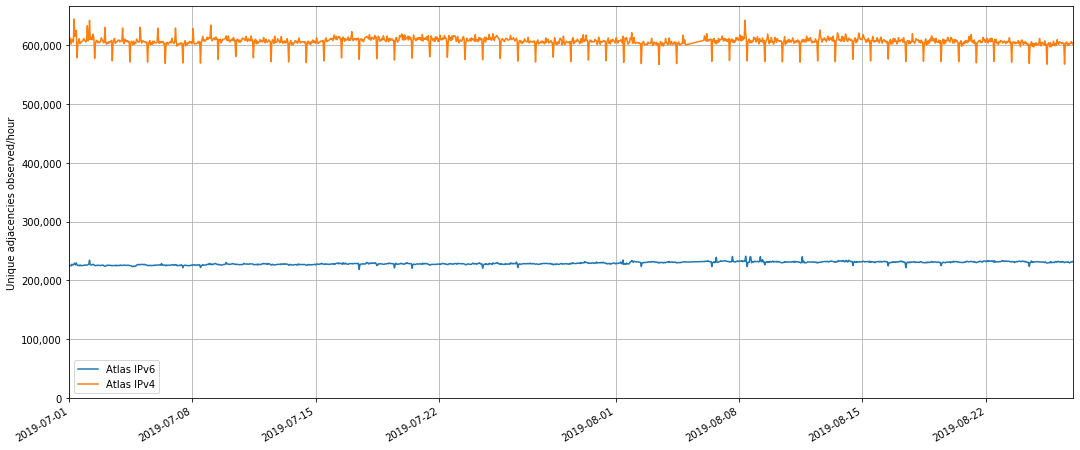

In [29]:
import matplotlib as mplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 8]
fig, ax = plt.subplots()

for af in [6, 4]:
        grp   = hourly_af_atlas_counts[(hourly_af_atlas_counts['af'] == af)]
        #grp = grp[['ts','count']].groupby(["ts"]).sum().reset_index()
        label = "Atlas IPv" + str(af)
        #print(label)
        #print(grp)
        ax    = grp.plot(ax=ax, x='ts', y='count', label=label)

ax.grid(True)
ax.set_xlabel('')
ax.set_ylabel('Unique adjacencies observed/hour')
ax.get_yaxis().set_major_formatter(
    mplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)
plt.ylim(ymin = 0)

#plt.show()